Neste script treinamos e avaliamos um modelo preditivo para uma tarefa de CLASSIFICAÇÃO. É possível escolher logo no início o protocolo experimental a ser utilizado: Validação Cruzada (VC) ou Holdout (HO), assim como você pode escolher a técnica de ML entre: KNN ou DT (Decision Tree).

- métricas de avaliação: taxa de acerto, precisão, revocação, f1 e matriz de confusão

Recursos necessários:
- numpy: biblioteca numérica
- sklearn: biblioteca de machine learning, em especial o KNN, DT, as métricas de avaliação e o model_selection que nos permite executar validação cruzada

In [1]:
# Importa bibliotecas necessárias
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.datasets import load_digits

Carregando a base de dados do problema, representada aqui por X e y, onde:
- X: array contendo N instâncias com M atributos (atributos de entrada do problema)
- y: array contendo o rótulo (atributo alvo) de cada instância em X


In [2]:
# A base de dados digits é composto por 1.797 instâncias (N=1.797), imagens de tamanho 8x8
# e cada instância é representada por um vetor de 64 atributos (M=64), sendo que cada atributo pode ter um valor entre 0 e 16 (valor do pixel)

X, y = load_digits(return_X_y=True)
print("Formato de X: ", X.shape)
print("Formato de y: ", y.shape)

Formato de X:  (1797, 64)
Formato de y:  (1797,)


Neste ponto definimos o protocolo experimental e a técnica de Machine Learning a ser utilizada.

In [3]:
# Defina o protocolo experimental e a técnica de ML
PE='VC' # utilize VC para validação cruzada 10 folds e HO para Holdout 70/30
TE = 'NAIVE'

match TE:
 case 'KNN':
   clf = KNeighborsClassifier(n_neighbors=3, weights='distance')
   method = 'KNN'
 case 'TREE':
   clf = DecisionTreeClassifier(criterion='entropy', max_depth=5)
   method = 'Decision Tree'
 case "MLP":
    clf = MLPClassifier(early_stopping=True, random_state=42, hidden_layer_sizes=[64])
    method = 'Multilayer Perceptron'
 case "NAIVE":
   clf  = GaussianNB()
   method = 'Naive Bayes'

# Instanciando, treinando e testando o modelo conforme o protocolo escolhido

In [4]:
# Treinando e avaliando o modelo de acordo com o protocolo escolhido.

if PE=='HO': # PROTOCOLO Holdout (70/30)
    xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X, y, test_size=0.3, random_state=10) # divide a base em treino e teste
    clf.fit(xtrain, ytrain) # treina o modelo
    result=clf.score(xtest, ytest) # testa o modelo e cálcula da taxa de acerto
    y_pred=clf.predict(xtest) # retorna a predição para cada exemplo de teste
    predicted_proba=clf.predict_proba(xtest) # retorna a probabilidade de cada classe para cada exemplo de teste
    precision=precision_score(ytest, y_pred, average='weighted') # calculando precisão
    recall=recall_score(ytest, y_pred, average='weighted') # calculando revocação
    f1=f1_score(ytest, y_pred, average='weighted') # calculando f1
    matrix=confusion_matrix(ytest, y_pred) # calculando a matriz de confusão
else: # PROTOCOLO Validação Cruzada (10 folds)
    result = model_selection.cross_val_score(clf, X, y, cv=10) # executa validação cruzada considerando 10 folds.
    y_pred=model_selection.cross_val_predict(clf, X, y, cv=10) # retorna a predição para cada exemplo de teste.
    predicted_proba=model_selection.cross_val_predict(clf, X, y, cv=10, method='predict_proba') # retorna a probabilidade de cada classe para cada exemplo de teste.
    precision=precision_score(y, y_pred, average='weighted') # calculando precisão
    recall=recall_score(y, y_pred, average='weighted') # calculando revocação
    f1=f1_score(y, y_pred, average='weighted') # calculando f1
    matrix=confusion_matrix(y, y_pred) # calculando a matriz de confusão


Algumas observações sobre a avaliação do modelo:

- A variável *result* que criamos anteriormente já tem a taxa de acerto média e desvio padrão (média dos 10 folds na validação cruzada) e apenas um valor no caso de holdout.

- As funções predict() e cross_val_predict()* retornam a classe para cada exemplo de teste. Quando usamos o parâmetro '*method=predict_proba*' retorna a probabilidade de cada classe para cada exemplo de teste.

Considerando tp=true positivive, fp=false positive e fn=false negative.

- A função *precision_score()*: calcula tp / (tp + fp)

- A função *recall_score()* calcula: tp / (tp + fn)

- A função *f1_score()* calcula a média harmônica entre *precision* e *recall*.

- A função *confusion_matrix()* recebe como entrada os rótulos do teste (y_test) e a predição do modelo (y_pred). Ela retorna uma matriz CxC onde C é a quandidade de classes. No exemplo C=10, logo uma matriz 10x10 onde na diagonal temos os acertos e nas demais posições as confusões entre as classes do problema. A matriz de confusão é usada para avaliar classificador apenas e muito importante para analisarmos os erros do nosso modelo (ou hipótese de solução para o problema).  


RESULTADOS DO PROTOCOLO CROSS-VALIDATION-> Naive Bayes
Mean Accuracy: 0.81139
Mean Std: 0.06333
Precision = 0.837 
Recall = 0.811 
F1 = 0.814 
Matriz de Confusão


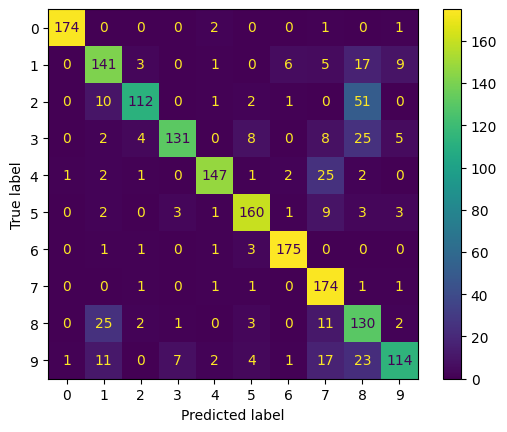

In [5]:

# Mostrando taxas de acerto conforme o protocolo escolhido
if PE=='HO':
  print ('RESULTADOS DO PROTOCOLO HOLDOUT ->', method)
  print("Accuracy: %.5f" % result)
else: # no caso de validação cruzada - média e desvio padrão
  print ('RESULTADOS DO PROTOCOLO CROSS-VALIDATION->', method)
  print("Mean Accuracy: %.5f" % result.mean())
  print("Mean Std: %.5f" % result.std())

# Precisão na base de teste
print("Precision = %.3f " % precision)

# Revocação na base de teste
print("Recall = %.3f " % recall)

# f1 na base de teste
print("F1 = %.3f " % f1)

print("Matriz de Confusão")
labels=[0,1,2,3,4,5,6,7,8,9] # isto muda conforme o problema
disp=ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=labels)
disp.plot()

# salvando o modelo
from joblib import dump, load
with open("Modelo.mod", 'wb') as fo:
    dump(clf, fo)